# Linear viscous stability of shear flows

In this section, we are interested in solving the linearized Navier-Stokes equations for the evolution of disturbances introduced to a base shear flow, $U(y)$, flowing in the $x$ direction. Throughout, we will assume that all disturbance fields are periodic in $x$ (the streamwise direction) and $z$ (the spanwise direction). Thus, we can write a disturbance $u(x,y,z,y)$ as

$$u(x,y,z,t) = \mathrm{re}(\hat{u}(y,t) \mathrm{e}^{i(\alpha x + \beta z)}),$$

where $\mathrm{re}$ denotes the real part (not Reynolds number).

It turns out that we can write the linearized Navier-Stokes equations about this base flow entirely in terms of the $y$ disturbance velocity, $\hat{v}(y,t)$, and the $y$ disturbance vorticity, $\hat{\eta}(y,t)$. The other quantities can be derived from these. The resulting equations are called the Orr-Sommerfeld equations, and take the form

$$M \dfrac{\partial q}{\partial t} = L q$$

for an initial condition $q(y,0) = q_0(y)$. The disturbance function contains the two aforementioned fields, $q(y,t) = [\hat{v}(y,t), \hat{\eta}(y,t)]$. 

The linear operators $M$ and $L$ are not just matrices, but also contains differential operators in $y$. The structure of $L$ is important. It has the form

$$L = \begin{bmatrix}\mathcal{L}_{os} & 0 \\ i \beta U'(y) & \mathcal{L}_{sq} \end{bmatrix}.$$

where $\mathcal{L}_{os}$ is called the Orr-Sommerfeld operator and $\mathcal{L}_{sq}$ is the Squire operator. The exact forms of these are not important to discuss here. However, we note two things:
- This is *almost* block diagonal. If it were, then the $y$ velocity and the $y$ vorticity would be decoupled from each other.
- However, the block in the lower left corner is very important, as it turns out. It means that the $y$ vorticity depends on the $y$ velocity (but not vice versa!).

We will focus our discussion on base flows that are confined to the range between $y = -1$ and $y = 1$. There are two well-known base flows that fit this category: Poiseuille flow and Couette flow. In non-dimensional form, these are
$$U(y) = 1 - y^2$$
and
$$U(y) = y,$$
respectively.


We can approximate functions in this confined $y$ region by a sum of orthogonal polynomials (Chebyshev). The $y$ dependence of the solution is thus contained in these Chebyshev modes, and from hereon the two parts of $q$ are each a vector of Chebyshev coefficients rather than a function of $y$. It is not important to worry about this too much. However, it means that, from hereon, **$q$ is only function of $t$**, and and our system of equations is a system of ODEs:

$$\dfrac{\mathrm{d} q}{\mathrm{d} t} = L_1 q, \quad q(0) = q_0$$

where $L_1 = M^{-1} L$ (after the matrices have folded in the Chebyshev approximations). We will study $L_q$ in great detail.

Let's load some helpful tools for studying these equations.

In [1]:
using OrrSommerfeld
using Plots

Remember, the disturbance $q(t)$ is actually the amplitude of the function $\mathrm{re}(q(t) \mathrm{e}^{i(\alpha x + \beta z)})$. That means that $L_1$ depends on the wave numbers $\alpha$ and $\beta$. It also depends on the Reynolds number $Re$, since we're still talking about Navier-Stokes here.

Let's explore an example of a disturbance to Poiseuille flow for a given choice of these parameters, $\alpha = 1$, $\beta = 0$ (uniform in $z$), and Reynolds number 5000. We set up the problem with the function `os_matrices`

In [2]:
Re = 5000
α, β = 1.0, 0.0

dOS = os_matrices(α,β,Re,baseflow=:poiseuille);

Let's construct an example of a disturbance field. Here, we will initialize a vector `q0` and set a few values of `q0` to be non-zero. This corresponds to choosing a few Chebyshev modes.

In [3]:
q0 = zero_q(dOS);
q0[5] = 1.0;
q0[1] = -1.0;

From `q0` (and making use of the data in `dOS`) we can construct every velocity and vorticity field. For example, to compute the y velocity field in the x-y plane over a range of x values from 0 to 8,

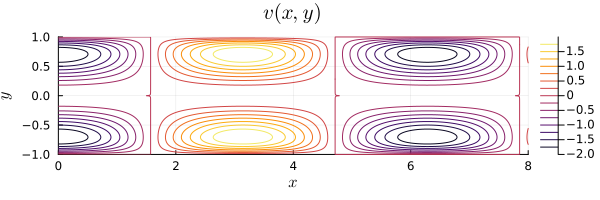

In [4]:
x, y, v = velocity_y(q0,dOS,glims=(0,8),plane=:xy);
plot(x, y, v, ratio=1, ylims=(-1,1),xlabel="\$x\$",ylabel="\$y\$",title="\$v(x,y)\$",size=(600,200))

Or the streamwise vorticity in the y-z plane. (There is no such vorticity in this case...)

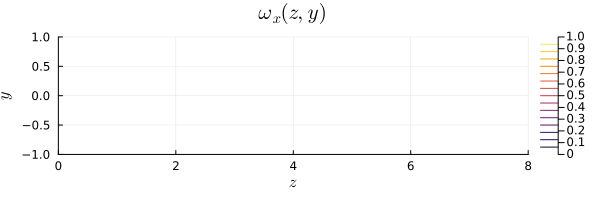

In [5]:
z, y, wx = vorticity_x(q0,dOS,glims=(0,8),plane=:yz);
plot(z, y, wx, ratio=1, ylims=(-1,1),xlabel="\$z\$",ylabel="\$y\$",title="\$\\omega_x(z,y)\$",size=(600,200))

## Exponential solutions of the Orr-Sommerfeld problem

There are a few ways that we can study the behavior of these equations. First, we will suppose that the time dependence has the form of exponential functions, i.e.,

$$q(t) = \tilde{q} \mathrm{e}^{-i\omega t}$$

It is very important to emphasize that $\omega$ is as complex quantity: it has a real and an imaginary part. In particular, **if the imaginary part of $\omega$ is positive, then this solution is exponentially unstable**.


With this assumed form for $q(t)$, the governing ODE changes to an algebraic equation:

$$L_1 \tilde{q} = -i \omega \tilde{q}$$

This is an eigenvalue problem. The eigenvalues of $L_1$ are $-i \omega$, and the corresponding solutions $\tilde{q}$ are eigenvectors. To make this a little easier, we can divide $L_1$ by $-i$, so that the eigenvalues are $\omega$. To get these, we use the function `os_eigen`. There are a lot of eigenvalues, but we only really care about those with imaginary parts that aren't very small (negative), so we limit attention to those with $\mathrm{im}(\omega) > -1.5$:

In [6]:
eOS = os_eigen(dOS,ilims=(-1.5,Inf));
ω, X = eOS.values, eOS.vectors;

The values are sorted from largest imaginary part to smallest, so let's check the first one to see if it is positive imaginary part.

In [7]:
ω[1]

0.26813147117267283 - 0.001750340646645985im

It is just barely negative, so all of the eigenfunctions are stable at this choice of $\alpha$, $\beta$, and Reynolds number. Let's plot all of the eigenvalues, and highlight the one with the largest imaginary part.

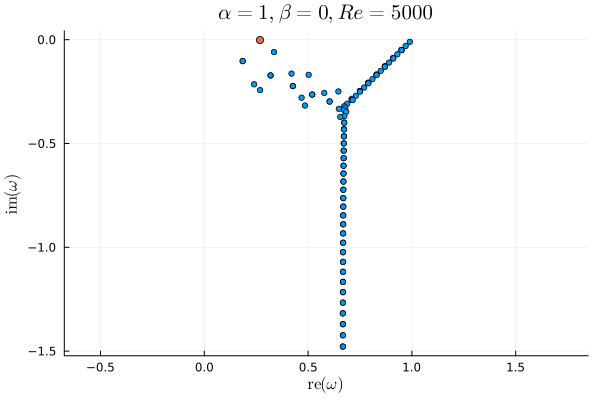

In [11]:
scatter(real(ω),imag(ω),ratio=1,markersize=3,legend=false,
    xlabel="\$\\mathrm{re}(\\omega)\$",
    ylabel="\$\\mathrm{im}(\\omega)\$",
    title="\$\\alpha=1, \\beta = 0, Re = 5000\$")
scatter!(real([ω[1]]),imag([ω[1]]))

There are quite a few different "regions" of these eigenvalues. Actually, there are really *two* sets of eigenvalues here. Remember before that we found that the operator has almost a block diagonal structure. This means that there are two sets of eigenvalues/vectors:

- One set is associated with the O-S operator, $\omega^{os}$ and $\tilde{q}^{os}$. These have a $y$ velocity as well as a $y$ vorticity that is "forced" by the $y$ velocity.
- The other set is associated with the Squire operator, $\omega^{sq}$ and $\tilde{q}^{sq}$. These have no $y$ velocity, only $y$ vorticity.

We can distinguish these with the indices `eOS.ios` and `eOS.isq`:

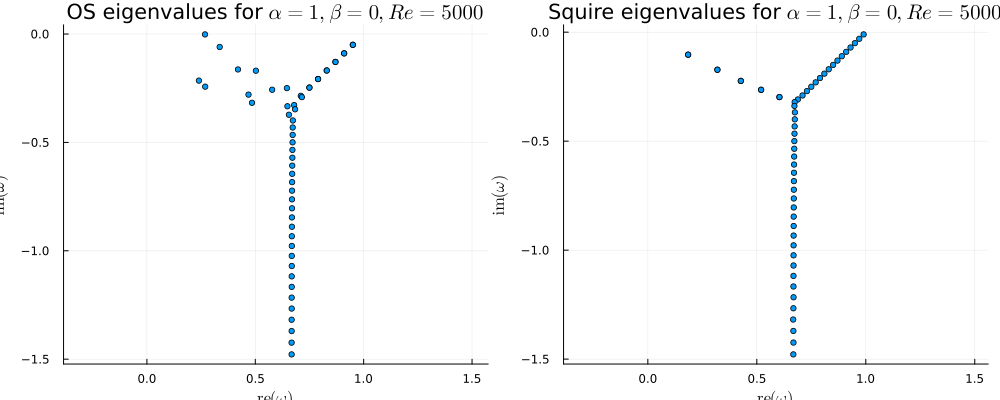

In [12]:
plot(scatter(real(ω[eOS.ios]),imag(ω[eOS.ios]),
        title="OS eigenvalues for \$\\alpha=1, \\beta = 0, Re = 5000\$"),
    scatter(real(ω[eOS.isq]),imag(ω[eOS.isq]),
        title="Squire eigenvalues for \$\\alpha=1, \\beta = 0, Re = 5000\$"),
    size=(1000,400),ratio=1,markersize=3,legend=false,
    xlabel="\$\\mathrm{re}(\\omega)\$",
    ylabel="\$\\mathrm{im}(\\omega)\$")

Each eigenvalue in these plots is associated with an eigenvector, representing a form of disturbance. So let's take a look at some representative cases.

The first is the least stable eigenvalue. We plot the streamwise velocity disturbance in the x-y plane for this mode:

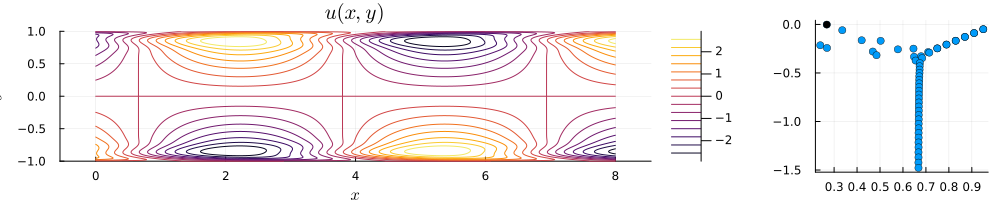

In [13]:
ω1 = ω[eOS.ios[1]]
q1 = X[:,eOS.ios[1]]
x, y, u1 = velocity_x(q1,dOS,glims=(0,8),plane=:xy);
plt1 = plot(x, y, u1, ratio=1, ylims=(-1,1),xlabel="\$x\$",ylabel="\$y\$",title="\$u(x,y)\$")

l = @layout [a{0.8w} b]
plt2 = scatter(real(ω[eOS.ios]),imag(ω[eOS.ios]))
scatter!(plt2,real([ω1]),imag([ω1]),color=:black,legend=:false)
plot(plt1,plt2,layout=l,size=(1000,200))

This is called the ***Tollmein-Schlichting*** mode. A notable aspect of this mode is that the streamwise velocity is anti-symmetric across the midplane.

Now, a mode on the right-most branch. For this one, most of the disturbance is concentrated near the midplane:

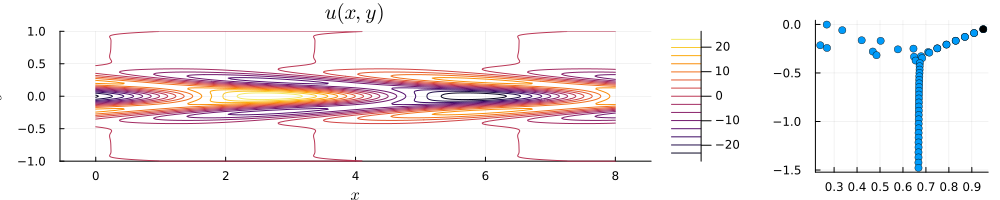

In [14]:
ω2 = ω[eOS.ios[2]]
q2 = X[:,eOS.ios[2]]
x, y, u2 = velocity_x(q2,dOS,glims=(0,8),plane=:xy);
plt1 = plot(x, y, u2, ratio=1, ylims=(-1,1),xlabel="\$x\$",ylabel="\$y\$",title="\$u(x,y)\$")

l = @layout [a{0.8w} b]
plt2 = scatter(real(ω[eOS.ios]),imag(ω[eOS.ios]))
scatter!(plt2,real([ω2]),imag([ω2]),color=:black,legend=:false)
plot(plt1,plt2,layout=l,size=(1000,200))

Next, a case on the lowest branch, called the "S" branch. For this case, we see highly oscillatory behavior concentrated at the 1/4 and 3/4 positions across the channel:

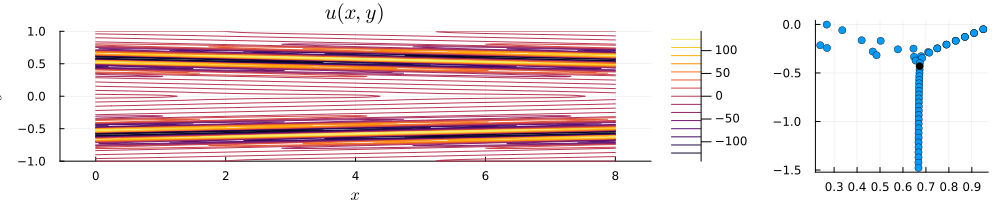

In [16]:
ω3 = ω[eOS.ios[30]]
q3 = X[:,eOS.ios[30]]
x, y, u3 = velocity_x(q3,dOS,glims=(0,8),plane=:xy);
plt1 = plot(x, y, u3, ratio=1, ylims=(-1,1),xlabel="\$x\$",ylabel="\$y\$",title="\$u(x,y)\$")

l = @layout [a{0.8w} b]
plt2 = scatter(real(ω[eOS.ios]),imag(ω[eOS.ios]))
scatter!(plt2,real([ω3]),imag([ω3]),color=:black,legend=:false)
plot(plt1,plt2,layout=l,size=(1000,200))

Finally, let's look at one of the Squire modes. These have flow going across the span of the channel, so we look at the z component of velocity in the y-z plane:

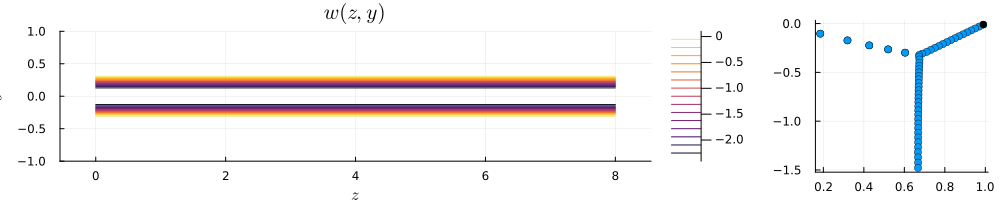

In [17]:
ωsq = ω[eOS.isq[1]]
qsq = X[:,eOS.isq[1]]
z, y, wsq = velocity_z(qsq,dOS,glims=(0,8),plane=:yz);
plt1 = plot(z, y, wsq, ratio=1, ylims=(-1,1),xlabel="\$z\$",ylabel="\$y\$",title="\$w(z,y)\$")

l = @layout [a{0.8w} b]
plt2 = scatter(real(ω[eOS.isq]),imag(ω[eOS.isq]))
scatter!(plt2,real([ωsq]),imag([ωsq]),color=:black,legend=:false)
plot(plt1,plt2,layout=l,size=(1000,200))

### Effect of Reynolds number
If we increase the Reynolds number, the Tollmein-Schlichting mode becomes unstable. Let's try Re = 8000, with the same choice $\alpha=1$ and $\beta=0$ as before.

In [18]:
Re = 8000
α, β = 1.0, 0.0

dOS = os_matrices(α,β,Re,baseflow=:poiseuille);

Compute the eigenvalues/vectors

In [19]:
eOS = os_eigen(dOS,ilims=(-1.5,Inf),normalize=:true);

Look at the first value. Remember, the first one is the one with the largest imaginary part:

In [20]:
eOS.values[1]

0.24707506030767173 + 0.0026644112812369398im

The negative part is positive. So at this Reynolds number, the Tollmein-Schlichting mode for a disturbance $(\alpha,\beta) = (1,0)$ is **unstable**.

We can view this from the point of view of energy growth. Here, we will compute the energy vs time for an initial condition that comprises just the unstable mode. That is, the initial condition is just the eigenvector associated with the unstable eigenvalue.

To do this, we create a vector of modal coefficients, but only set the first one to non-zero value. Remember, the first one is the unstable one; the rest are stable:

In [21]:
κ0 = zeros(ComplexF64,length(eOS.values));
κ0[1] = 1.0

1.0

Now we evaluate the disturbance energy over time. We will look over a long time:

In [22]:
tr = range(0,150,length=100);
E = disturbance_energy(κ0,dOS,eOS,tr);

Finally, plot it:

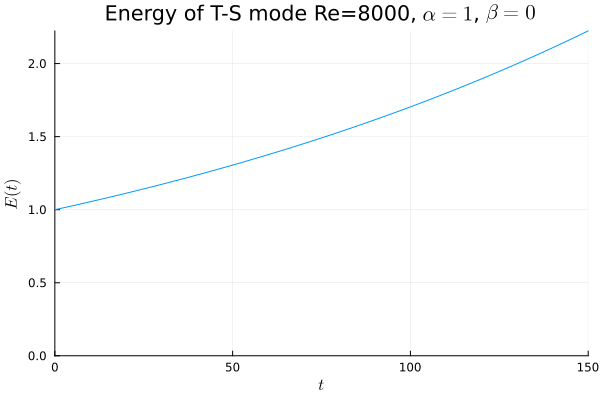

In [23]:
plot(tr,E,xlabel="\$t\$",ylabel="\$E(t)\$",xlim=(0,Inf),ylim=(0,Inf),legend=:false,title="Energy of T-S mode Re=8000, \$\\alpha=1\$, \$\\beta=0\$")

As expected, the energy grows exponentially (though it is a slow exponential growth).